In [1]:
import numpy as np

from astropy.io import ascii

import tracepol

import matplotlib.pyplot as plt

In [2]:
tracepars = tracepol.get_tracepars()

tracepol.py:48: RankWarning: Polyfit may be poorly conditioned
  wpars = np.polyfit(ygrid, wavegrid, order)


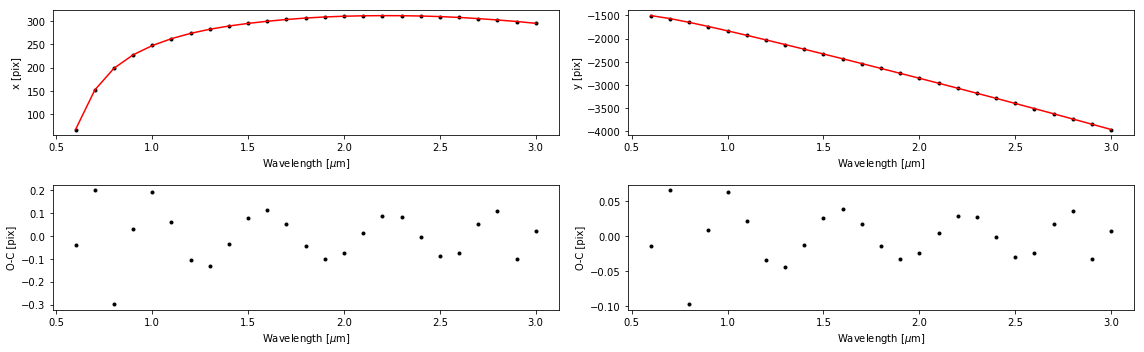

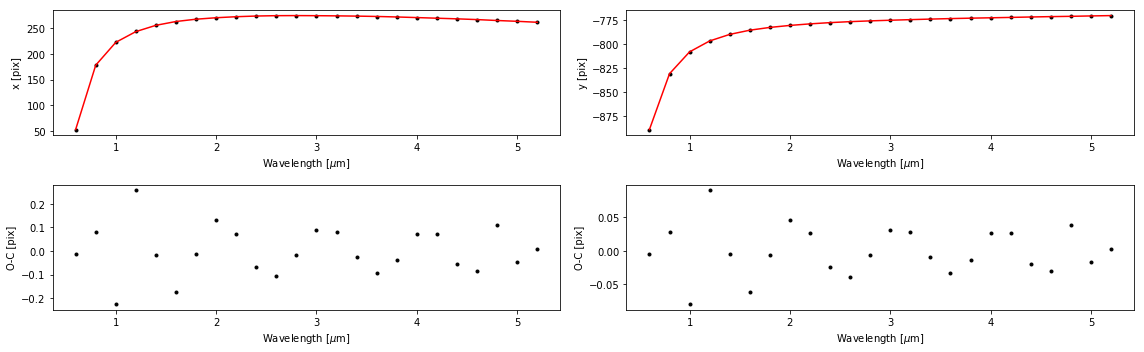

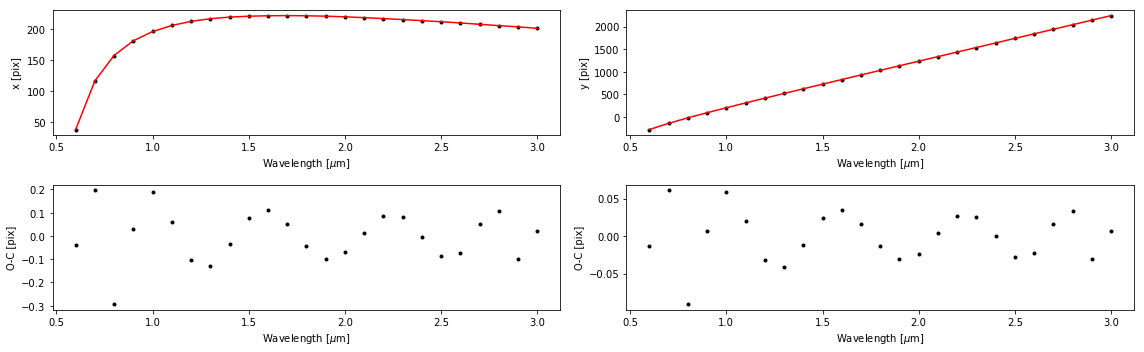

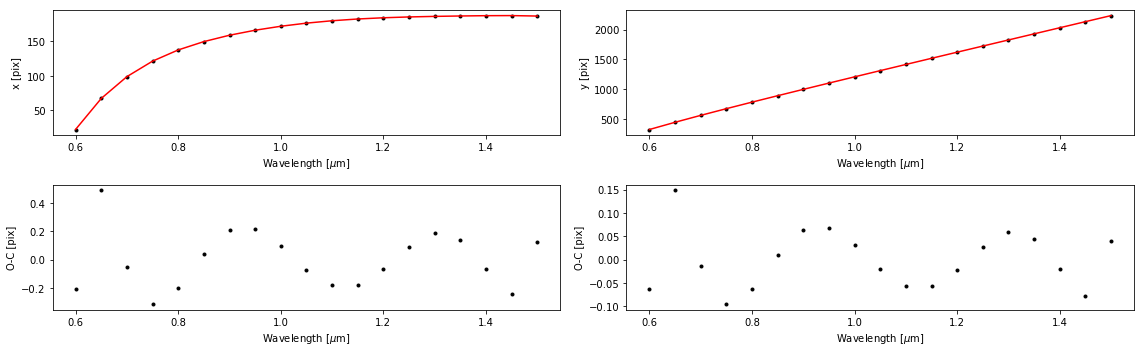

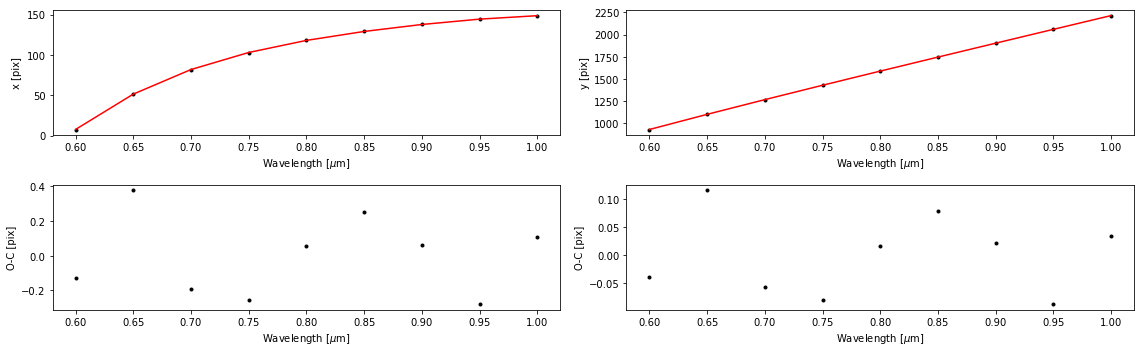

In [3]:
# Read the trace.
trace = ascii.read('NIRISS_GR700_trace.csv')
trace['xpos'] /= 0.018
trace['ypos'] /= 0.018

# Plot the transformation to x, y for different m.
for m in [-1, 0, 1, 2, 3]:
    mask = trace['order'] == m
    wave = trace['Wavelength'][mask]
    xpos = trace['xpos'][mask]
    ypos = trace['ypos'][mask]

    x, y, mask = tracepol.wavelength2xy(wave, tracepars, m=m)

    plt.figure(figsize=(16,5))

    ax1 = plt.subplot(221)
    plt.plot(wave, xpos, 'k.')
    plt.plot(wave, x, 'r-')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('x [pix]')

    ax2 = plt.subplot(222)
    plt.plot(wave, ypos, 'k.')
    plt.plot(wave, y, 'r-')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('y [pix]')

    plt.subplot(223, sharex=ax1)
    plt.plot(wave, xpos - x, 'k.')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('O-C [pix]')

    plt.subplot(224, sharex=ax2)
    plt.plot(wave, ypos - y, 'k.')
    plt.xlabel(r'Wavelength [$\mu$m]')
    plt.ylabel('O-C [pix]')

    plt.tight_layout()
    plt.show()


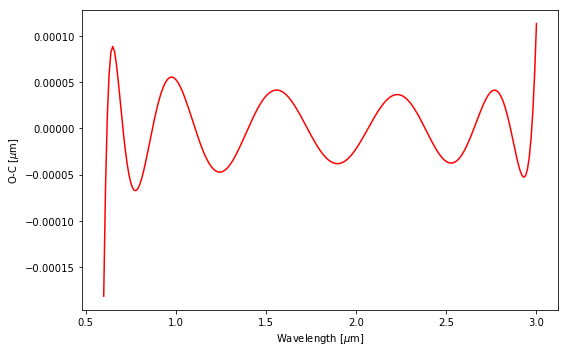

In [4]:
# Check the accuaracy of the inverse transfromation for m=1.
wave = np.linspace(0.6, 3.0, 241)
y, mask = tracepol.wavelength2y(wave, tracepars)
wave_p, mask = tracepol.y2wavelength(y, tracepars)

plt.figure(figsize=(8,5))

ax1 = plt.subplot(111)
plt.plot(wave, wave - wave_p, 'r-')
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel(r'O-C [$\mu$m]')

plt.tight_layout()
plt.show()

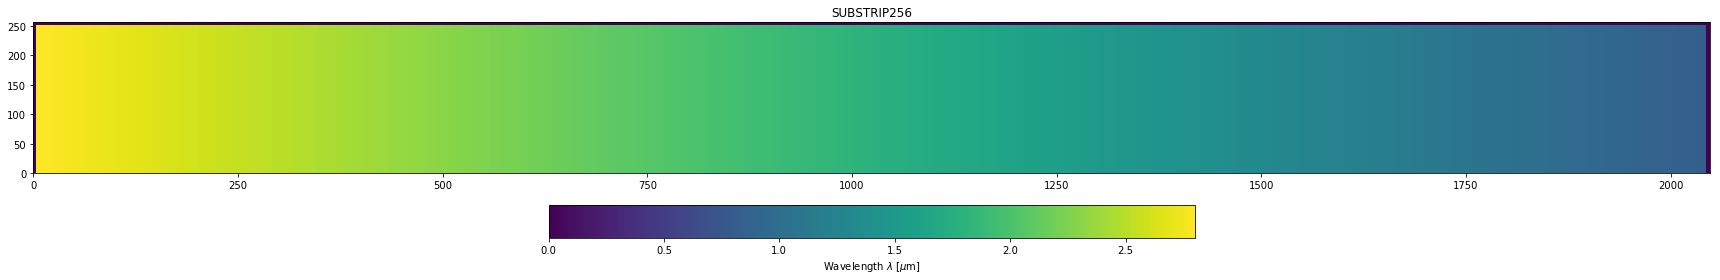

In [5]:
wavelength_map = tracepol.wavelength_map_2D(1, tracepars)

plt.figure(figsize=(24, 4))

plt.subplot(111)
plt.title('SUBSTRIP256')

plt.pcolormesh(wavelength_map)

cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Wavelength $\lambda$ [$\mu$m]')

plt.tight_layout()
plt.show()  